


#**A supervised classification model for term deposit prediction**


###**Abstract**:

####The bank pertaining to the dataset is facing a revenue decline. Knowing that term deposits allow the bank to hold on to a deposit for a fixed time and improve financial gains, they decided to create a machine learning model which predicts the capability of their existing clients to subscribe to a term deposit.

###**Problem Statement**:

####The dataset in our procession is related with the direct marketing campaigns of this banking institution. The classification goal is to predict if the client will subscribe to a term deposit. 



### **Bank client data**:

####Lets take a look at the various feature columns:
 
1. Age (numeric)
2. Job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3 month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

###**Output variable:**
21. y: has the client subscribed a term deposit? (binary: ‘yes’,’no’)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

###**1. Data Collection**

In [ ]:

drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/My Drive/project/bank-additional-full.csv", sep=';')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print('There are', df.shape[0], 'observations and',df.shape[1], 'Features including target "y" in the dataset')

There are 41188 observations and 21 Features including target "y" in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **2. Exploratory Data analysis**

In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
# Countplot of target column

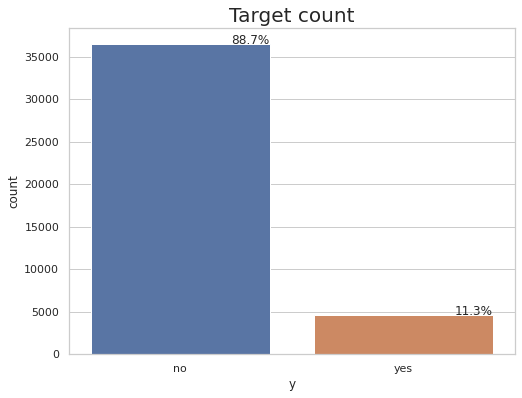

In [ ]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='y', data = df)
total = float(len(df))
plt.title('Target count', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

This is an imbalanced dataset since 88.7% of target is 'NO' and only 11.3% of target is 'YES'

#### **2.1 Univariate Data Analysis**

In [ ]:
#Plotting count of Job Distribution

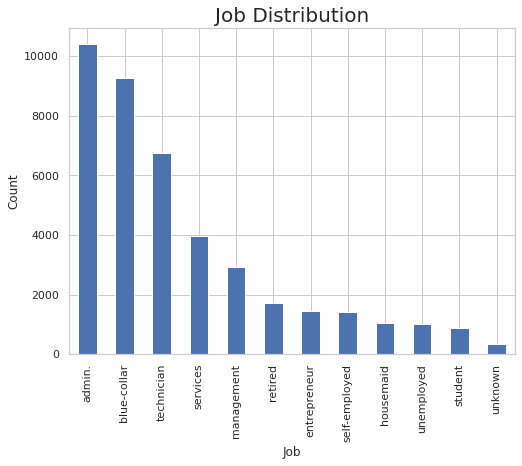

In [ ]:
job_count = df['job'].value_counts()
plt.figure(figsize = (8, 6))
job_count.plot(kind = "bar")
plt.title("Job Distribution",fontsize=20)
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

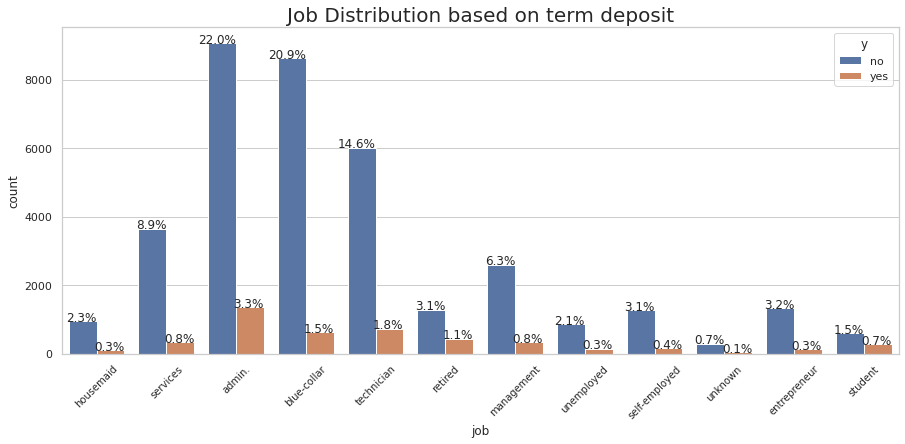

In [ ]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='job', data = df, hue='y')
total = float(len(df))
plt.title('Job Distribution based on term deposit', fontsize=20)
plt.xticks(rotation = 45,fontsize = 10)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

In the dataset the majority are from Admin, blue collar and technician jobs & most of the term deposit subscibers are also from these categories.

In [ ]:
#Plotting count of Marital Distribution

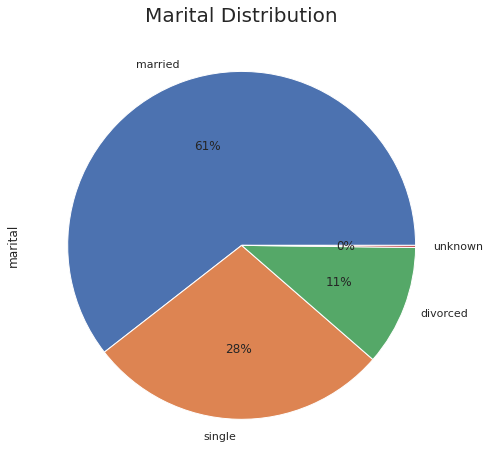

In [ ]:
mar_count = df['marital'].value_counts()
plt.figure(figsize = (8, 8))
mar_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Marital Distribution",fontsize=20)
plt.show()

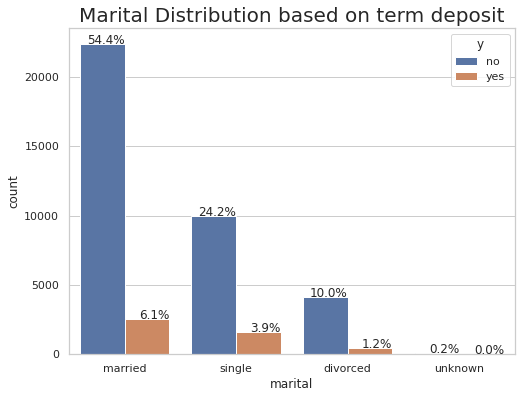

In [ ]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='marital', data = df, hue='y')
total = float(len(df))
plt.title('Marital Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

As most of the clients are married, both term deposit acceptance and rejection rate is significant among them.

In [ ]:
#Plotting count of Credit in default Distribution

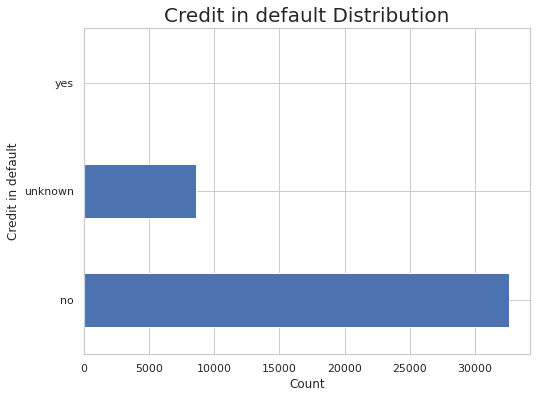

In [ ]:
cred_count = df['default'].value_counts()
plt.figure(figsize = (8, 6))
cred_count.plot(kind = "barh")
plt.title("Credit in default Distribution",fontsize=20)
plt.ylabel("Credit in default")
plt.xlabel("Count")
plt.show()

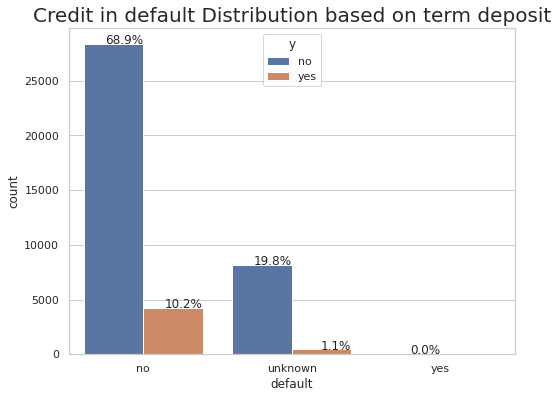

In [ ]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='default', data = df, hue='y')
total = float(len(df))
plt.title('Credit in default Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Compared to other features presence of unknown value is more in this particular feature.

In [ ]:
#Plotting count of Housing loan Distribution

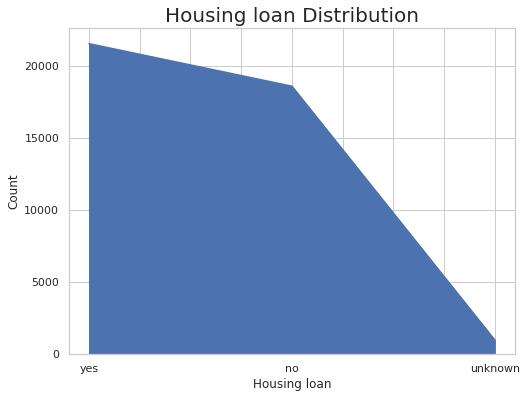

In [ ]:
hou_count = df['housing'].value_counts()
plt.figure(figsize = (8, 6))
hou_count.plot(kind = "area")
plt.title("Housing loan Distribution",fontsize=20)
plt.xlabel("Housing loan")
plt.ylabel("Count")
plt.show()

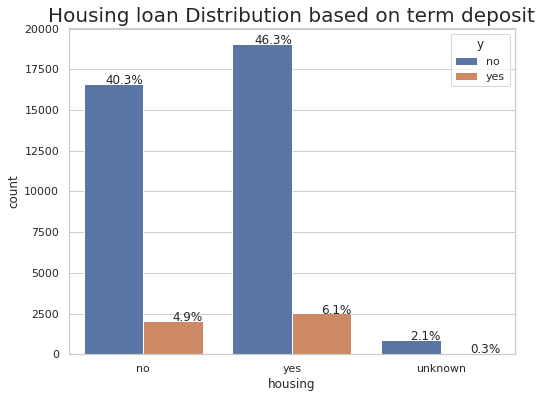

In [ ]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='housing', data = df, hue='y')
total = float(len(df))
plt.title('Housing loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

6.1% clients subscribed term depoit eventhough they had housing loan.

In [ ]:
#Plotting count of Job Distribution of Clients with personal loan

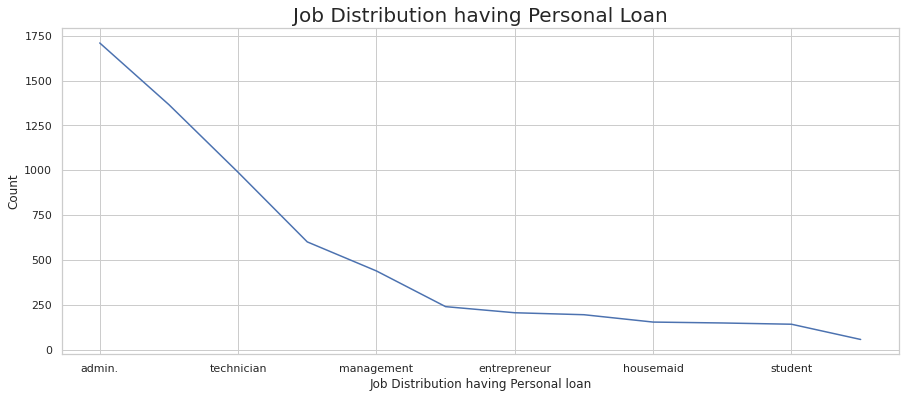

In [ ]:
plt.figure(figsize = (15, 6))
job_count_yes = df[df['loan']=='yes']
job_count_y=job_count_yes['job'].value_counts()
job_count_y.plot(kind = "line")
plt.title("Job Distribution having Personal Loan",fontsize=20)
plt.xlabel("Job Distribution having Personal loan")
plt.ylabel("Count")
plt.show()

In [ ]:
#Plotting count of Personal loan Distribution

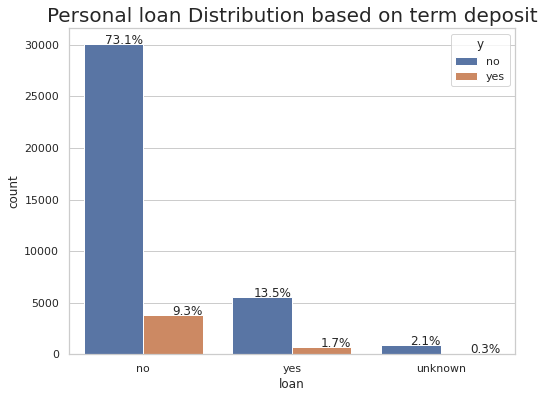

In [ ]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='loan', data = df, hue='y')
total = float(len(df))
plt.title('Personal loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the people are free from personal loan and at the same time 9.3% subscribed the term deposit from that category.

In [ ]:
#Pie-chart of Educational distribution of clients

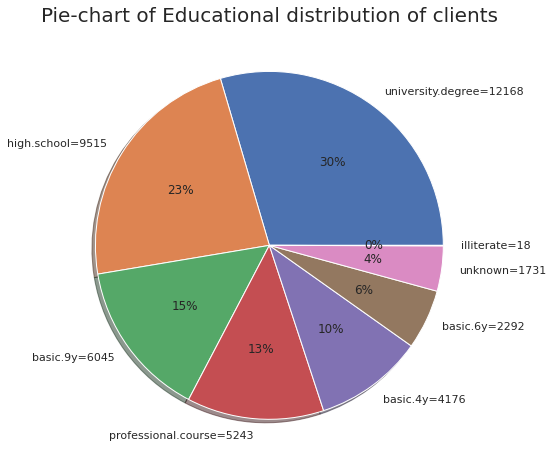

In [ ]:
plt.figure(figsize = (8, 8))
education_count = df['education'].value_counts()
plt.pie(education_count, labels=["university.degree=12168","high.school=9515","basic.9y=6045",
"professional.course=5243","basic.4y=4176","basic.6y=2292","unknown=1731","illiterate=18"],autopct='%.0f%%',shadow=True)
plt.title('Pie-chart of Educational distribution of clients',size=20)
plt.show()

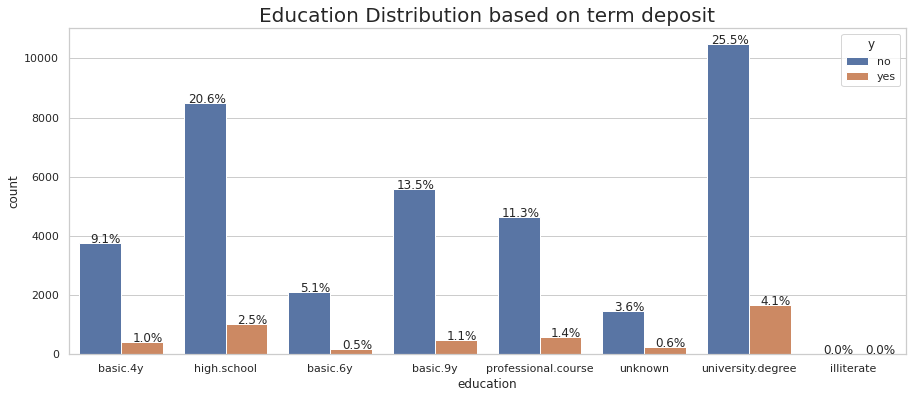

In [ ]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='education', data = df, hue='y')
total = float(len(df))
plt.title('Education Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the clients have high school or above education. They constitutes the major part in term deposit subscription. 


In [ ]:
#Plotting count of Communication type Distribution

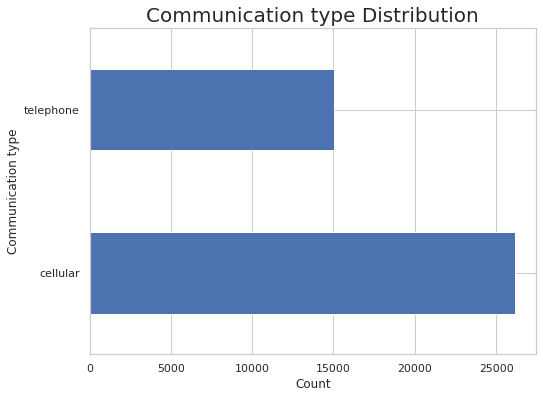

In [ ]:
comm_count = df['contact'].value_counts()
plt.figure(figsize = (8, 6))
comm_count.plot(kind = "barh")
plt.title("Communication type Distribution",fontsize=20)
plt.ylabel("Communication type")
plt.xlabel("Count")
plt.show()

In [ ]:
#Plotting count of Last contact month Distribution

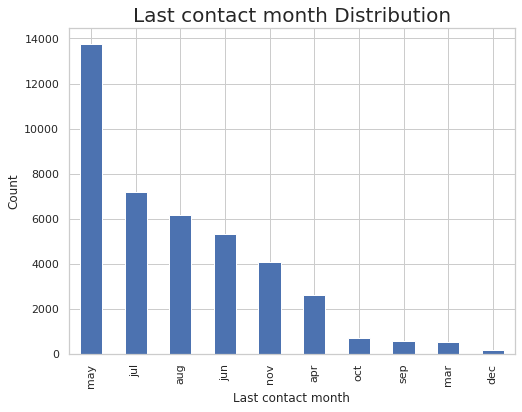

In [ ]:
mon_count = df['month'].value_counts()
plt.figure(figsize = (8, 6))
mon_count.plot(kind = "bar")
plt.title("Last contact month Distribution",fontsize=20)
plt.xlabel("Last contact month")
plt.ylabel("Count")
plt.show()

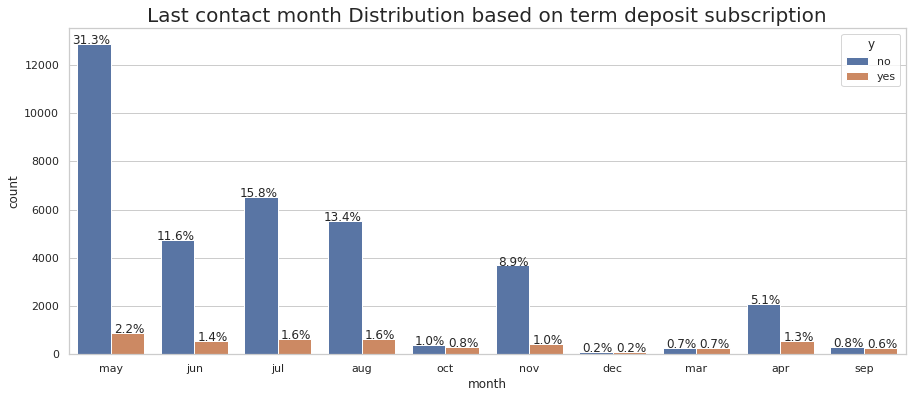

In [ ]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='month', data = df, hue='y')
total = float(len(df))
plt.title('Last contact month Distribution based on term deposit subscription', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Eventhough the campaigning was meagre during the months october, december, march and september, we can see that the campaigning was effective as the rate of term deposit subscription  is almost equal to the non subscription. In other months the difference between subscription and non subscription is very high.

In [ ]:
#Plotting count of the Last contact day of week Distribution

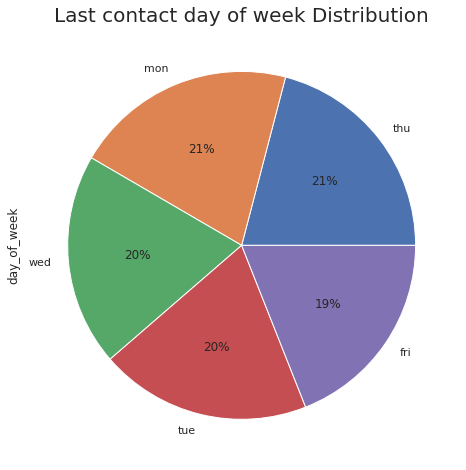

In [ ]:
day_count = df['day_of_week'].value_counts()
plt.figure(figsize = (8, 8))
day_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Last contact day of week Distribution",fontsize=20)
plt.show()

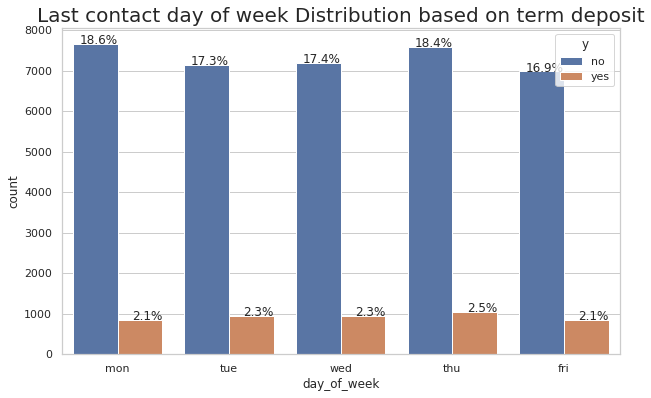

In [ ]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='day_of_week', data = df, hue='y')
total = float(len(df))
plt.title('Last contact day of week Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The categorical feature last day of contact has no role in term deposit subscription.

In [ ]:
#Plotting count of the Outcome of the previous marketing campaign Distribution

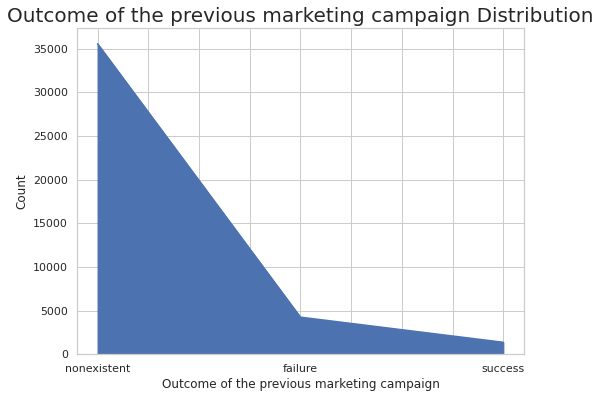

In [ ]:
pout_count = df['poutcome'].value_counts()
plt.figure(figsize = (8, 6))
pout_count.plot(kind = "area")
plt.title("Outcome of the previous marketing campaign Distribution",fontsize=20)
plt.xlabel("Outcome of the previous marketing campaign")
plt.ylabel("Count")
plt.show()

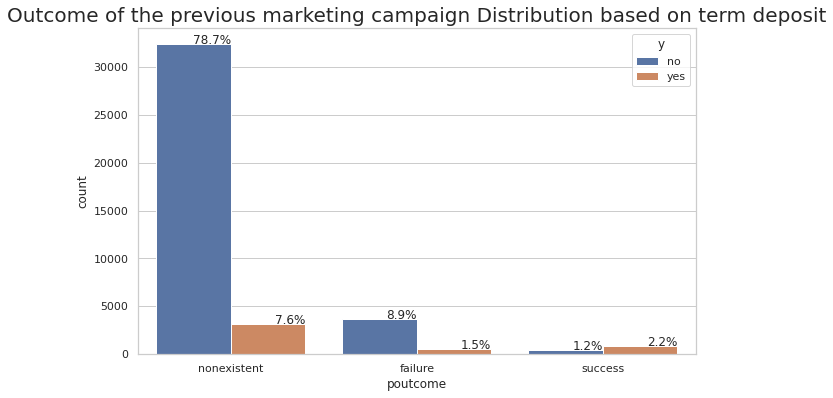

In [ ]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='poutcome', data = df, hue='y')
total = float(len(df))
plt.title('Outcome of the previous marketing campaign Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The chance of attaining subscription to a new term deposit is higher for  clients who have subscribed term deposit in previous campaigns. Nearly 10% of clients who did not attend the previous campaign has subscribed the term deposit.

### **2.2 Bivariate Data Analysis**

In [ ]:
#Plotting 'Duration' vs 'campaign'

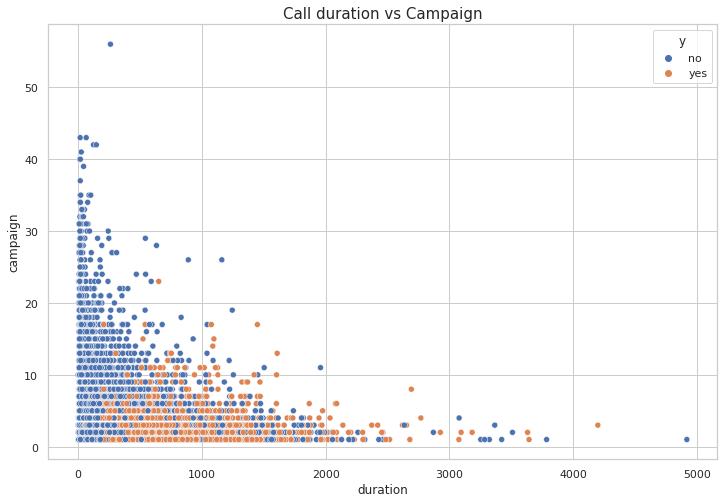

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Call duration vs Campaign',size=15)
sns.scatterplot(data=df, x='duration', y ='campaign', hue='y')
plt.show()

There is an increase in tendency to take term deposit with the increase in call duration. As the number of contacts performed increases the chance of subscription decreases.

In [ ]:
#Plotting 'Job' vs 'age'

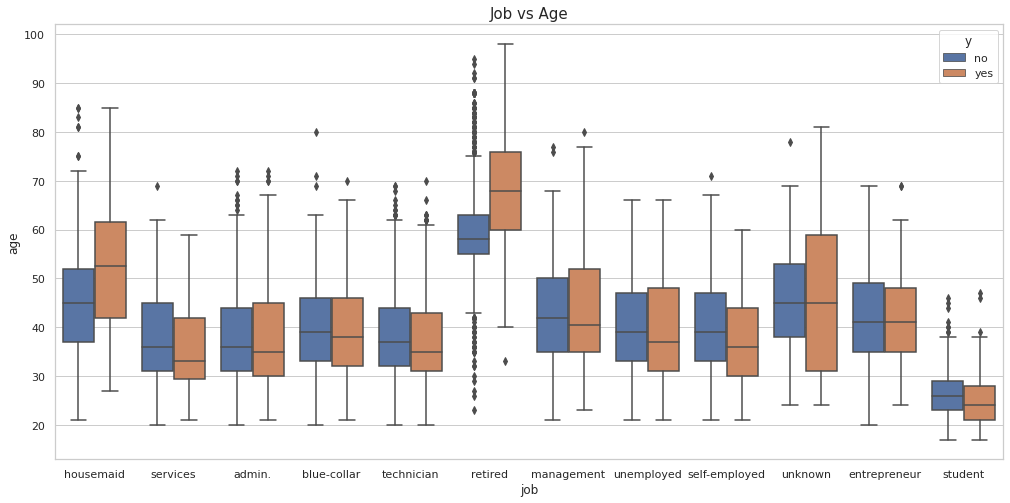

In [ ]:
plt.figure(figsize = (17, 8))
sns.boxplot(data=df, x='job', y='age',hue='y')
plt.title('Job vs Age',size=15)
plt.show()

Median age of the clients are in between 30 and 50.

In [ ]:
#Plotting 'previous' vs 'duration'

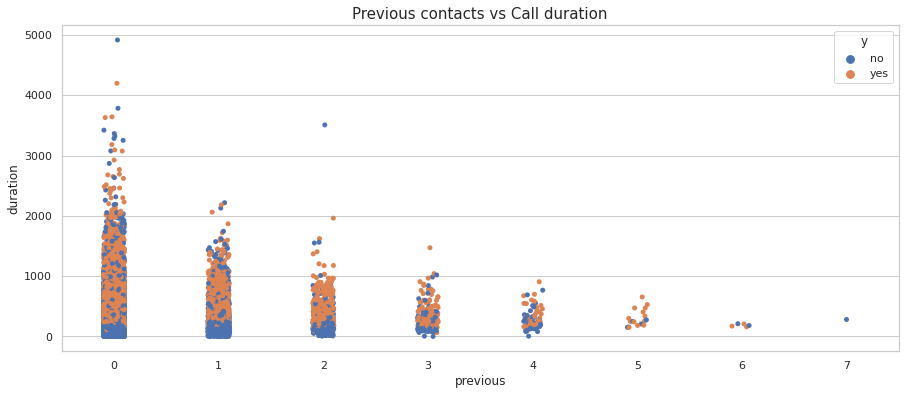

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Previous contacts vs Call duration',size=15)
sns.stripplot(x='previous',y= "duration",hue='y', data=df)
plt.show()

Term deposit subscription depends on call duration rather than number of contacts performed before this campaign. 

In [ ]:
#Plotting 'age' vs 'duration'

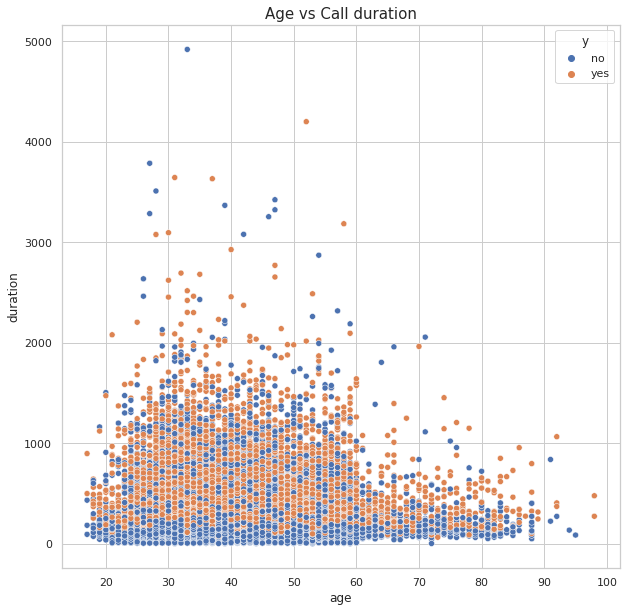

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Age vs Call duration',size=15)
sns.scatterplot(x ='age',y= 'duration',hue='y', data=df)
plt.show()

Age has no specific dependance on term deposit subscription. It depends mainly on call duration. 

## **3**. **Preprocessing** 

### **3.1 Missing Value Handling**

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

isna() function gives no Missing values but there are missing vlaues as 'unknown'

Since it's an imbalanced dataset, We have already decided to oversample our data set. So, removing 'unknown' values having target y= 'NO' and keeping the rest 'unknown' values as separate category for acquiring better results.


In [ ]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
df=df[(df['default']!='unknown')&(df['job']!='unknown')&(df['marital']!='unknown')&(df['education']!='unknown')&(df['loan']!='unknown')&(df['housing']!='unknown')|(df['y']=='yes')]
df.shape

(31269, 21)

In [ ]:
df.y.value_counts()

no     26629
yes     4640
Name: y, dtype: int64

### **3.2 Feature Engineering**

In [ ]:
df["any_loan"]=(df["housing"]=='yes')| (df["loan"]=='yes')

In [ ]:
df["any_loan"].value_counts()

True     18849
False    12420
Name: any_loan, dtype: int64

**Removing Biased Features**

In [ ]:
df['pdays'].value_counts()

999    29831
3        420
6        397
4        112
9         61
2         59
7         56
12        54
10        45
5         45
13        35
11        27
1         22
15        22
14        18
8         17
0         14
16         9
17         7
18         7
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [ ]:
df['previous'].value_counts()

0    26405
1     3887
2      686
3      203
4       64
5       18
6        5
7        1
Name: previous, dtype: int64

'pdays' and 'previous' have dominating value as 999 and 0 respectively. Thus removing 'pdays' and 'previous'.

Duration: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

We are creating a predictive model. So, removing 'duration' feature

In [ ]:
df=df.drop(['duration','pdays','previous'],axis=1)

### **3.3 Outlier Detection**

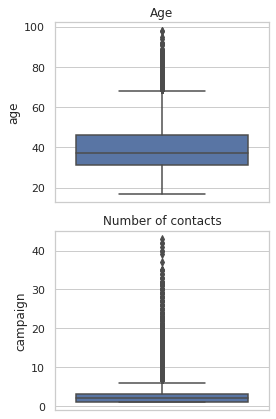

In [ ]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df['campaign'])
plt.tight_layout() 
plt.show()

'Campaign' and 'age' show outliers 

In [ ]:
for i in ["age", "campaign"]:
        for j in df["y"].unique():
            target_type = df[df["y"] == j]
            column = target_type[i]
            q1 = column.quantile(0.25) 
            q3 = column.quantile(0.75) 
            iqr = q3 - q1 
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr        
            outliers = column[(column > upper_limit) | (column < lower_limit)].index 
            df.drop(index= outliers, inplace=True)

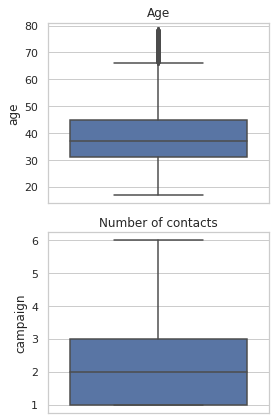

In [ ]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df['campaign'])
plt.tight_layout() 
plt.show()

Outliers are removed

In [ ]:
df.y.value_counts()

no     24766
yes     4005
Name: y, dtype: int64

### **3.4 Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in df.columns:
    if df[i].dtype ==  bool or df[i].dtype == object and i!='y':
        df[i]=label_en.fit_transform(df[i])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,any_loan
0,56,3,1,0,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,7,1,3,0,2,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,0,1,1,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,7,1,3,0,0,2,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
6,59,0,1,5,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0


### **3.5 Feature Reduction**

We need to split dataset before further pre-processing

In [ ]:
y = df['y']
x = df.drop('y', axis = 1)

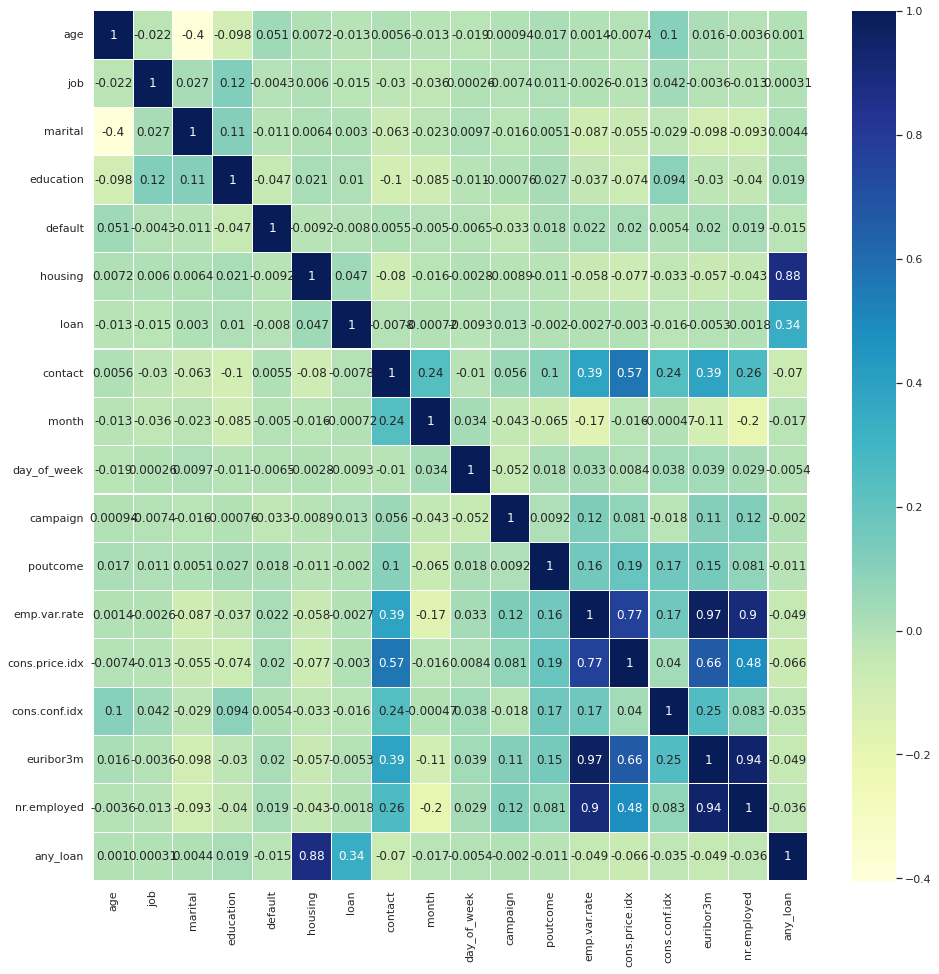

In [ ]:
corr=x.corr()
plt.figure(figsize=(16,16))
ax = sns.heatmap(corr, annot=True, linewidths=0.1, linecolor='white',cmap="YlGnBu")

In [ ]:
columns = np.full((corr.shape[0]), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8 or corr.iloc[i,j] <= -0.8:
            if columns[i]:
                columns[i] = False
selected_columns = x.columns[columns]
x = x[selected_columns]

In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'any_loan'],
      dtype='object')

### **3.6 Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE(sampling_strategy='auto', random_state = 0, k_neighbors=5).fit_resample(x,y)

In [ ]:
y_smote.value_counts()

no     24766
yes    24766
Name: y, dtype: int64

### **3.7 Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_smote[['age','cons.price.idx','cons.conf.idx','nr.employed']] = sc.fit_transform(X_smote[['age','cons.price.idx','cons.conf.idx','nr.employed']])
X_smote.describe()

,age,job,marital,education,default,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,cons.conf.idx,nr.employed,any_loan
count,4.953200e+04,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,4.953200e+04,4.953200e+04,4.953200e+04,49532.000000
mean,1.648143e-15,3.740612,1.156101,3.894815,0.018291,0.251635,0.224279,4.246305,1.929864,1.702576,0.912138,-5.376639e-14,-4.463682e-15,-1.553279e-13,0.509024
std,1.000010e+00,3.624156,0.621420,2.001524,0.134455,0.632858,0.417111,2.540250,1.349343,1.055068,0.449722,1.000010e+00,1.000010e+00,1.000010e+00,0.499924
min,-1.994465e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.961124e+00,-1.936832e+00,-1.932390e+00,0.000000
25%,-7.311274e-01,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,-8.649073e-01,-1.092961e+00,-6.333328e-01,0.000000
50%,-2.799354e-01,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,1.000000,7.947608e-03,-2.857792e-01,-3.691372e-01,1.000000
75%,6.224486e-01,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000,1.000000,8.792184e-01,7.048527e-01,1.119126e+00,1.000000
max,3.510077e+00,11.000000,3.000000,7.000000,2.000000,2.000000,1.000000,9.000000,4.000000,6.000000,2.000000,2.103750e+00,2.447631e+00,1.119126e+00,1.000000


Standard scaling done for age, consumer price index, consumer confidence index and the number of employees in the bank since they are continuous values.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 5, test_size = .3)

Split the data as 70% train and 30% test sets by using train_test_split 

# **4. Modeling**

### **4.1 Logistic Regression**

In [ ]:
#importing logistic regression from linear model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_predict = logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_predict))
print("Precision is :", precision_score(y_test,y_predict, average='macro'))
print("Recall is :", recall_score(y_test,y_predict, average='macro'))
print("F1 score is :", f1_score(y_test,y_predict, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_predict))

Accuracy is : 0.7711978465679677
Precision is : 0.7713611988646075
Recall is : 0.7712219119123516
F1 score is : 0.7711732706031784



Confusion matrix

 [[5807 1608]
 [1792 5653]]


### **4.2 KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#creating empty list for finding optimal K values(Accuracy values)
acc_value = []
#creating neighbors as 3 to 15
neighbors = np.arange(3,15)
for k in neighbors:
    # taking instances for KNN into variable name classifier using the method minkowski
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_value.append(acc)

In [ ]:
acc_value

[0.8483849259757739,
 0.8437415881561238,
 0.8405787348586811,
 0.8405114401076716,
 0.8366083445491251,
 0.8324360699865411,
 0.8301480484522207,
 0.8281292059219381,
 0.8246971736204576,
 0.8249663526244952,
 0.82092866756393,
 0.8224764468371467]

ploting accuracy values

Text(0, 0.5, 'Accuracy values')

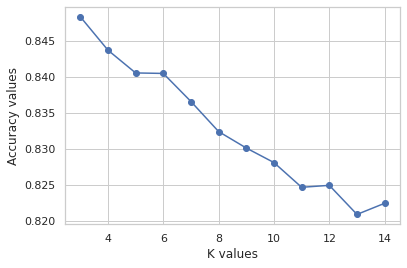

In [ ]:
plt.plot(neighbors,acc_value,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy values")

from the plot we can see that optimal k value is 3 and hence running KNN for K=3

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8483849259757739
Precision is : 0.8521998362930929
Recall is : 0.8482798331844178
F1 score is : 0.8479453279750738



Confusion matrix

 [[5904 1511]
 [ 742 6703]]


### **4.3 SVM Classifier**

In [ ]:
#importing SVC from SVM
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.7830417227456259
Precision is : 0.7860663493109804
Recall is : 0.7831449057530001
F1 score is : 0.7825081901995945



Confusion matrix

 [[6186 1229]
 [1995 5450]]


### **4.4 Decision Tree Classifier**

In [ ]:
#importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(X_train,y_train)
y_pred=dec_tree_model.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8569313593539704
Precision is : 0.8576128314698823
Recall is : 0.856887301664216
F1 score is : 0.8568519477600747



Confusion matrix

 [[6192 1223]
 [ 903 6542]]


### **4.5 Random Forest Classifier**

In [ ]:
#importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rand_f=RandomForestClassifier()
rand_f.fit(X_train,y_train)
y_pred=rand_f.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.891049798115747
Precision is : 0.8911969340853578
Recall is : 0.8910304697926399
F1 score is : 0.8910357045785722



Confusion matrix

 [[6536  879]
 [ 740 6705]]


### **4.6 Gradient Boosting Clasifier**

In [ ]:
#importing GradientBoostingClasifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
grad_b=GradientBoostingClassifier()
grad_b.fit(X_train, y_train)
y_pred=grad_b.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8090174966352625
Precision is : 0.8099471605913835
Recall is : 0.8090724200441357
F1 score is : 0.8088925262104668



Confusion matrix

 [[6201 1214]
 [1624 5821]]


### **4.7 XGB Classifier**

In [ ]:
#importing XGBClassifier from xgboost
from xgboost import XGBClassifier

In [ ]:
xg_boost=XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred=xg_boost.predict(X_test)

In [ ]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8045087483176312
Precision is : 0.8062616570496008
Recall is : 0.8045847113491746
F1 score is : 0.8042550248913571



Confusion matrix

 [[6245 1170]
 [1735 5710]]


### **Inference: Random Forest Classifier shows the highest accuracy between all the 7 models. Hence we will fine tune the same.**

## **5. Hyperparameter Tuning**

###  ***5.1 Tuning by trial and Error***:

In [ ]:
pd.Series(rand_f.feature_importances_,index=x.columns).sort_values(ascending=False)*100

age               19.981326
nr.employed       11.006331
campaign           9.959531
job                8.521705
day_of_week        7.796255
education          7.689320
cons.conf.idx      5.999551
cons.price.idx     5.719450
contact            5.054762
marital            3.620523
loan               3.605413
any_loan           2.926104
poutcome           2.763153
default            2.734125
month              2.622450
dtype: float64

In [ ]:
rf_tune = RandomForestClassifier(n_estimators=120, max_depth=200, random_state=123, criterion="entropy")


In [ ]:
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=200, n_estimators=120,
                       random_state=123)

In [ ]:
y_pred=rf_tune.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8939434724091521
Precision is : 0.8941244180771037
Recall is : 0.8939221180090273
F1 score is : 0.8939272093582273



Confusion matrix

 [[6550  865]
 [ 711 6734]]


In [ ]:
conf=confusion_matrix(y_test,y_pred)
conf={'values':['True Positive','False Positive','False Negative','True Negative'],'count':[conf[0,0],conf[0,1],conf[1,0],conf[1,1]]}
conf=pd.DataFrame(conf)
conf

,values,count
0,True Positive,6550
1,False Positive,865
2,False Negative,711
3,True Negative,6734


Created a dataframe 'conf' with confusion matrix values

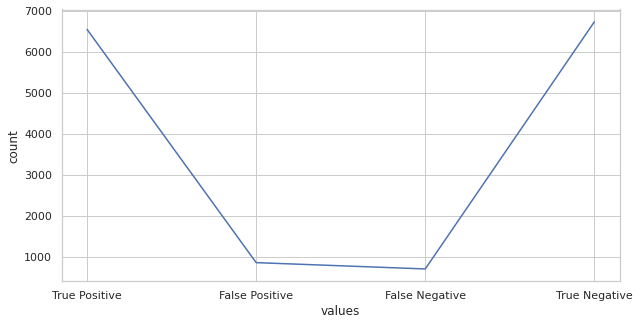

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=conf['values'],y=conf['count'])
plt.show()

Here we can see that out of 14,860 values, 13,254 (89.39%) are correctly predicted values comprised of true Positives and true negatives. There are only 1576 wrongly predicted values (10.61%).

 ***A small increase in Accuracy, Precision, Recall and F1 score was achieved after trial and error tuning. This doesn't seem effective, Let's try RandomizedsearchCV operation to improve performance.***

### **5.2** **RandomizedsSearchCV**

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score, plot_roc_curve
auc_scoring = make_scorer(roc_auc_score)

In [ ]:
# train a model for each max_depth in a list. Store the auc for the training set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train)[:,1]


    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
  

    # save aucs
    train_aucs[jj] = auc_train

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = range(200,1000,200)

max_features = ['auto','sqrt']

max_depth = range(2,20,2)

min_samples_split = range(2,10,2)

criterion = ['gini', 'entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion' :criterion}

print (random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [ ]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [ ]:
# fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(200, 1000, 200)},
                   random_state=42, scoring=make_scorer(roc_auc_score),
                   verbose=1)

In [ ]:
# Finding the best parameters based on the fits:
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 600}

In [ ]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]


thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)


print('AUC:%.3f'%(rf_train_base_auc))


print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train)[:,1]


rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)


print('AUC:%.3f'%(rf_train_opt_auc))

Baseline Random Forest
AUC:0.870
Optimized Random Forest
AUC:0.961


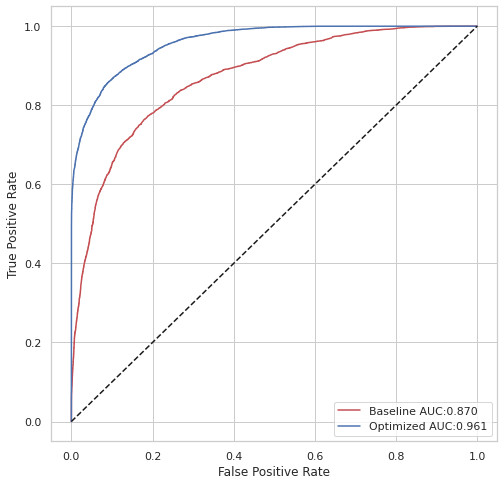

In [ ]:
from sklearn.metrics import roc_curve 
y_train=y_train.map({'yes': 1, 'no': 0})

fpr_b, tpr_b, thresholds_b = roc_curve(y_train, y_train_preds)
auc_b = roc_auc_score(y_train, y_train_preds)

fpr_o, tpr_o, thresholds_o = roc_curve(y_train, y_train_preds_random)
auc_o = roc_auc_score(y_train, y_train_preds_random)

plt.figure(figsize=(8,8))
plt.plot(fpr_b, tpr_b, 'r-',label ='Baseline AUC:%.3f'%auc_b)
plt.plot(fpr_o, tpr_o, 'b-',label ='Optimized AUC:%.3f'%auc_o)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**As we can see, after cross validation, there is a visible increase in the AUC score.**

### We have implemented a Web Application for Term Deposit prediction. The link is given below:

https://dsabatch2group2.pythonanywhere.com/